# Modelling and Analysis of Complex Networks
## Exercise 1
Name: Rukhsar Ahmed

# First of all we import our dataset using pandas library.


In [2]:
'Selecting dataset is Group 4'
import pandas as pd
facebook_edges=pd.read_csv('414.edges',header=None)
twitter_edges=pd.read_csv('1046661.edges',header=None)
print("Total Facebook Network are ",facebook_edges.head(5))
print("Total Twitter network are ",twitter_edges.head(5))

Total Facebook Network are           0
0  650 647
1  461 544
2  614 515
3  363 348
4  436 428
Total Twitter network are                   0
0  1044771 7423322
1  9921142 4556941
2  2916671 1049111
3    17743 1452261
4  1403031 1049981


Here we can see that we have two nodes in every row and also notice that these nodes are connected by an edge. First we separate these nodes using numpy library because we have two different network so we apply this process twice.



In [3]:
import numpy as np
facebook_edges[['edge1', 'edge2']] = facebook_edges[0].apply(lambda x: pd.Series(str(x).split(" ")))
list_facebook_edges=list(zip(facebook_edges['edge1'],facebook_edges['edge2']))
list_facebook_edges[:10] # 10 rows

[('650', '647'),
 ('461', '544'),
 ('614', '515'),
 ('363', '348'),
 ('436', '428'),
 ('400', '591'),
 ('636', '630'),
 ('500', '428'),
 ('524', '553'),
 ('561', '651')]

In [4]:
twitter_edges[['edge1', 'edge2']] = twitter_edges[0].apply(lambda x: pd.Series(str(x).split(" ")))
list_twitter_edges=list(zip(twitter_edges['edge1'],twitter_edges['edge2']))
list_twitter_edges[:10]

[('1044771', '7423322'),
 ('9921142', '4556941'),
 ('2916671', '1049111'),
 ('17743', '1452261'),
 ('1403031', '1049981'),
 ('1118161', '1117341'),
 ('6100262', '51421542'),
 ('991221', '814153'),
 ('1117341', '1118161'),
 ('1116721', '795536')]

We understand and draw our networks using the network library.

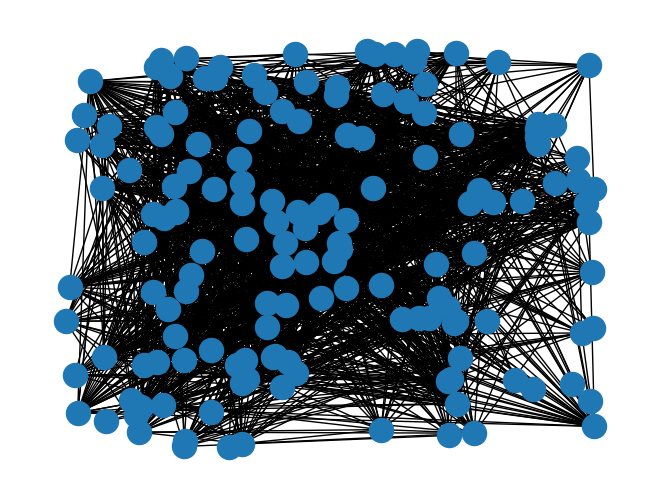

In [5]:
import networkx as nx
facebook_network = nx.from_edgelist(list_facebook_edges)
nx.draw_random(facebook_network)

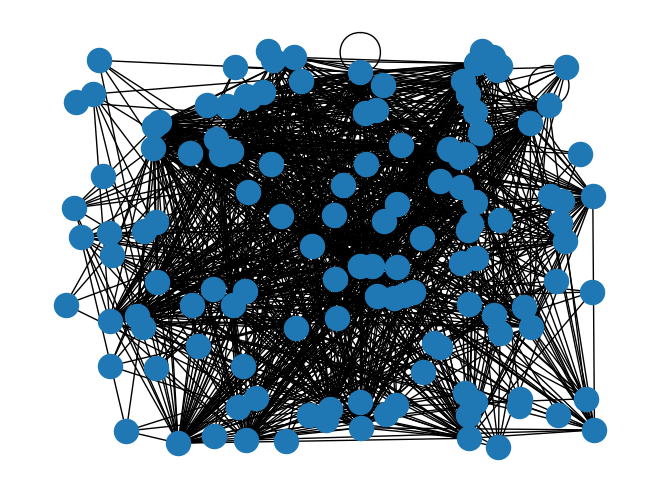

In [6]:
twitter_network = nx.from_edgelist(list_twitter_edges)
nx.draw_random(twitter_network)

# Q1.How many nodes and edges are there in the networks?

# Facebook

In [7]:
fb_node=facebook_network.number_of_nodes()
print("Total number of nodes in facebook are :", fb_node)
fb_edge=facebook_network.number_of_edges()
print("Total number of edges in facebook are :", fb_edge)



Total number of nodes in facebook are : 150
Total number of edges in facebook are : 1693


# Twitter

In [8]:
twt_node=twitter_network.number_of_nodes()
print("Total number of nodes in twitter are  :", twt_node)
twt_edge=twitter_network.number_of_edges()
print("Total number of edges in twitter are  :", twt_edge)

Total number of nodes in twitter are  : 128
Total number of edges in twitter are  : 1057


#    # Q2.  What are the maximum degree and the average degree of the Facebook networks?

In [9]:
cfb_deg=list(nx.degree(facebook_network))
fb_deg=[]
for i,j in cfb_deg:
    fb_deg.append(j)
print('Maximum degree of a node in Facebook are : ', max(fb_deg))

G1_deg = nx.degree_histogram(facebook_network)
G1_deg_sum = [a * b for a, b in zip(G1_deg, range(0, len(G1_deg)))]
print('Average degree of facebook nodes are : {}'.format(sum(G1_deg_sum) / facebook_network.number_of_nodes()))

Maximum degree of a node in Facebook are :  57
Average degree of facebook nodes are : 22.573333333333334


# What are the maximum degree and the average degree of the Twitter networks?

In [10]:
ctwt_deg=list(nx.degree(twitter_network))
twt_deg=[]
for i,j in ctwt_deg:
    twt_deg.append(j)
print('Maximum degree of a node in Twitter are: ', max(twt_deg))

G2_deg = nx.degree_histogram(twitter_network)
G2_deg_sum = [a * b for a, b in zip(G2_deg, range(0, len(G2_deg)))]
print('Average degree of Twitter nodes are : {}'.format(sum(G2_deg_sum) / twitter_network.number_of_nodes()))

Maximum degree of a node in Twitter are:  74
Average degree of Twitter nodes are : 16.515625


#  Q3. Extract 5 - 8 nodes from the network and state them as a partial network.?

In [11]:
# Help us to see the edges list.
x=list(facebook_network.edges())
x[:5]

[('650', '647'),
 ('650', '600'),
 ('650', '577'),
 ('650', '665'),
 ('650', '582')]

In [12]:
# Help us to see the edges list.
y=list(twitter_network.edges())
x[:5]

[('650', '647'),
 ('650', '600'),
 ('650', '577'),
 ('650', '665'),
 ('650', '582')]

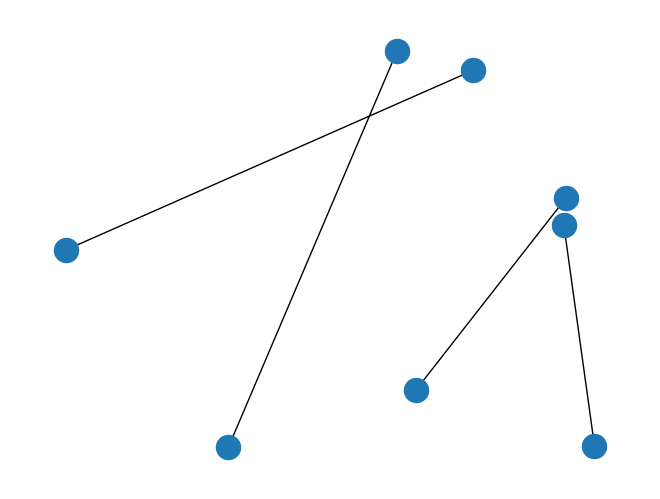

In [13]:
fb_partial_network=nx.from_edgelist([('650', '647'),
 ('461', '544'),
 ('614', '515'),
 ('363', '348')])
nx.draw_random(fb_partial_network)

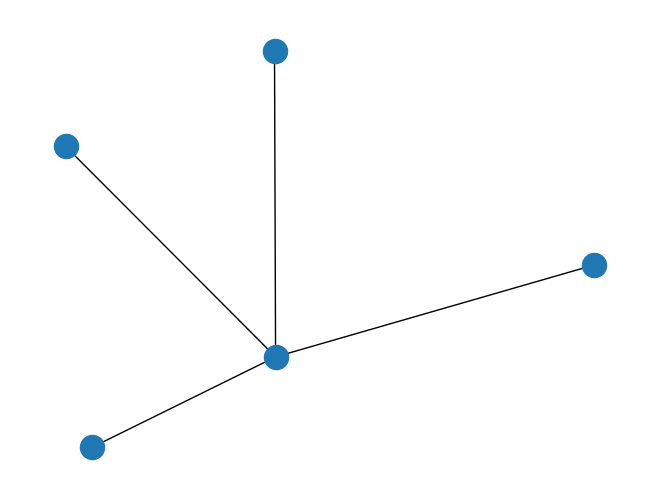

In [14]:
twt_partial_network=nx.from_edgelist([('1044771', '7423322'),
('1044771', '51421542'), ('1044771', '5516192'), ('1044771', '9952802')])
nx.draw_random(twt_partial_network)

In [15]:
A0 = nx.adjacency_matrix(fb_partial_network)
print(A0.todense())

[[0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]


In [16]:
A1 = nx.adjacency_matrix(twt_partial_network)
print(A1.todense())

[[0 1 1 1 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


## What is the adjacency matrix of the partial network?

Basically adjacency matrix is a saquare matrix which has binary value(0s and 1s) is used to represent a finite network. From the elements of adjacency matrix we can understand whether there is direct path between two vertices or not.

## Why do we need adjacency matrix to describe the structure of the network.?

The adjacency matrix may be used as a data structure for the representation of graphs in computer programmes that manipulate networks. The main alternative data structure utilised in this application is the adjacency list.
We can tell if there is an edge between any two given vertices by looking at the adjacency matrix, which is a square matrix. If the value is 1, then there are edges in the network between two nodes.
